# Neural and Evolutionary Learning - Final Project

## Notebook 3 - Evaluation of the four Models
- 2.1 Genetic Programming (GP)
- 2.2 Geometric Semantic Geometric Programming (GSGP)
- 2.3 Neural Networks with backpropagation (NN)
- 2.4 NeuroEvolution of Augmenting Topologies (NEAT)

### **1. Define RMSEs**
First, we need to set as variables the 10-dimensional evaluation metric (RMSE) vector and median of RMSE of each algorithm:

In [22]:
RMSE_GP =[0.5493314266204834, 0.47119712829589844, 0.608669102191925, 0.7458630800247192, 0.4773491322994232, 0.26259058713912964, 0.8935564756393433, 0.5121418237686157, 0.3910347521305084, 0.6897413730621338]
median_GP = 0.512142

RMSE_GSGP = [0.17297174036502838, 0.08542505651712418, 0.09707684814929962, 0.11079820245504379, 0.08555017411708832, 0.06670843064785004, 0.19457924365997314, 0.07164227217435837, 0.14319069683551788, 0.06163724139332771]
median_GSGP = 0.085550

RMSE_NN = [0.05796981230378151, 0.05761600658297539, 0.0578799806535244, 0.058431219309568405, 0.058440353721380234, 0.05767446011304855, 0.05819113180041313, 0.057966023683547974, 0.05770725756883621, 0.05763113498687744]
median_NN = 0.057923

RMSE_NEAT = [0.06421294813838227, 0.052080539691019494, 0.06241040499372979, 0.059267949283075196, 0.05692388766008969, 0.06820785744466334, 0.06257905782196159, 0.0605951983058181, 0.0745904275107406, 0.07405593163525723]
median_NEAT = 0.062495

### **2. The tests**

The comparison among the algorithms, regarding *if there is a statistically significant difference* between each pair of algorithms, should be done using statistical analysis.

More specifically, we will test *if there is a statistically significant difference between each pair of algorithms* using the folowing statistical tests and specific functions from the library of '*scikit_posthocs*':<br>

1) **pairwise Wilcoxon signed-rank tests for multiple comparisons**
    - **posthoc_wilcoxon**: which gives an output of p-values from the pairwise comparisons to compare the paired fitnesses(RMSEs) of the algorithms and identify which of them differ significantly, and

2) **Tukey's HSD (Honestly Significant Difference) test for multiple comparisons**
    - **pairwise_tukeyhsd**: which provides further information about the pairwise comparisons between the algorithms <font color="gray">(such as difference in mean, p-values again, rejecting or not the null hypothesis of no difference between the algorithms, and lower&upper bounds of the confidence interval for the difference in mean that if it does not include the 0 then it suggests a significance difference between the paired algorithms).</font>

In [ ]:
!pip install scikit-posthocs

In [15]:
import pandas as pd
import numpy as np
import scikit_posthocs as sp
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#### **2.1. Pairwise *Wilcoxon* test**

In [23]:
# combine the data
data = RMSE_GP + RMSE_GSGP + RMSE_NN + RMSE_NEAT
groups = ['GP']*len(RMSE_GP) + ['GSGP']*len(RMSE_GSGP) + ['NN']*len(RMSE_NN) + ['NEAT']*len(RMSE_NEAT)

# convert DataFrame
df = pd.DataFrame({'value': data, 'group': groups})

# perform the Wilcoxon posthoc test
wilcoxon_results = sp.posthoc_wilcoxon(df, val_col='value', group_col='group')


# display test results
wilcoxon_results

,GP,GSGP,NN,NEAT
GP,1.000000,0.001953,0.001953,0.001953
GSGP,0.001953,1.000000,0.001953,0.013672
NN,0.001953,0.001953,1.000000,0.048828
NEAT,0.001953,0.013672,0.048828,1.000000


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x20df762be60>)

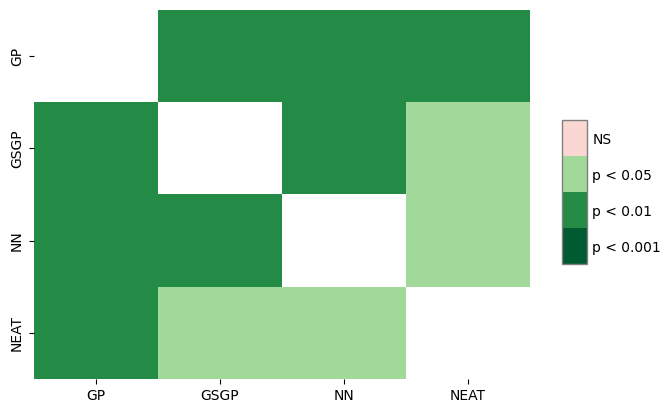

In [26]:
# heatmap of the results
sp.sign_plot(wilcoxon_results)

#### **2.2. Pairwise *Tukey's* HSD test**

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    GP   GSGP  -0.4512    0.0 -0.5645 -0.3378   True
    GP   NEAT  -0.4967    0.0   -0.61 -0.3833   True
    GP     NN  -0.5022    0.0 -0.6155 -0.3888   True
  GSGP   NEAT  -0.0455 0.7036 -0.1588  0.0679  False
  GSGP     NN   -0.051 0.6235 -0.1644  0.0623  False
  NEAT     NN  -0.0055 0.9992 -0.1189  0.1078  False
----------------------------------------------------


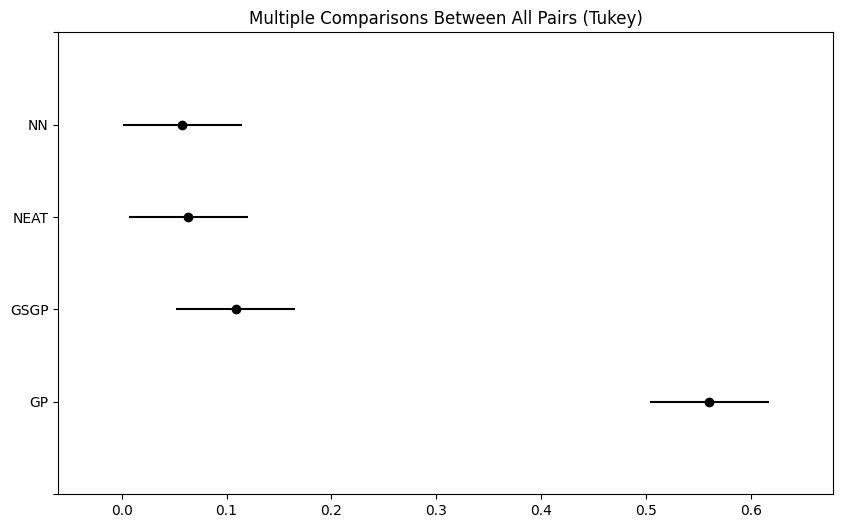

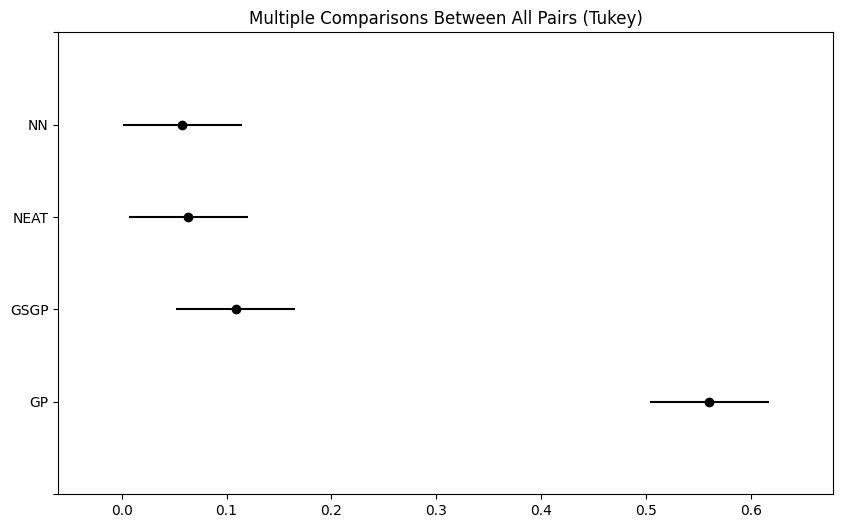

In [25]:
# data
RMSEs_t = np.concatenate([RMSE_GP, RMSE_GSGP, RMSE_NN, RMSE_NEAT])
# labels
k = ['GP'] * len(RMSE_GP) + ['GSGP'] * len(RMSE_GSGP) + ['NN'] * len(RMSE_NN) + ['NEAT'] * len(RMSE_NEAT)

# perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(RMSEs_t, k)

# Print the summary of the test
print(tukey_results.summary())

# Visualize the results
tukey_results.plot_simultaneous()

### **3. Interpretating the above results**

**pairwise_tukeyhsd**

1) Group Mean Differences (meandiff): This column shows the difference between the means of the two groups being compared. Positive values indicate that the first group (GP) has a higher mean than the second group (NN), while negative values indicate the opposite.

2) p-adj: This column contains the p-values adjusted for multiple comparisons. If the p-value is less than your chosen significance level (e.g., 0.05), it indicates that the difference between the two groups is statistically significant.

3) Reject (reject): This column indicates whether the null hypothesis of no difference between the two groups can be rejected based on the adjusted p-value. If "True," it means that the difference is statistically significant.

4) Lower and Upper Bound (lcb, ucb): These columns represent the lower and upper bounds of the confidence interval for the difference between the group means. If the interval does not include zero, it suggests a significant difference between the groups.

**posthoc_wilcoxon**<br>

1) Matrix Format:<br>
The output is usually a square matrix where each cell (i, j) contains the p-value of the Wilcoxon signed-rank test for the comparison between group i and group j.<br>
The diagonal of the matrix (where i == j) typically contains NaN or zeros because it's the comparison of each group with itself.

2) P-Values:<br>
Each p-value indicates whether there is a statistically significant difference between the two compared groups.<br>
A p-value less than your chosen significance level (commonly 0.05) suggests a significant difference between the two groups.

3) Symmetric Matrix:<br>
The matrix is symmetric because the Wilcoxon test comparison between group i and group j is the same as the comparison between group j and group i.